In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df_script_lines = pd.read_csv("simpsons_script_lines.csv", index_col=0)
df_script_lines

/var/folders/r7/nyn0pbkd469dh1skmjprpkt80000gn/T/ipykernel_5595/2067004566.py:1: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_script_lines = pd.read_csv("simpsons_script_lines.csv", index_col=0)


,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
id,,,,,,,,,,,,
9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31
9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22
9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5
9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40.0,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33
...,...,...,...,...,...,...,...,...,...,...,...,...
9544,32,204,Miss Hoover: (OFF LISA'S REACTION) I'm back.,831000,true,464,3.0,Miss Hoover,Springfield Elementary School,I'm back.,im back,2
9545,32,205,"Miss Hoover: You see, class, my Lyme disease t...",839000,true,464,3.0,Miss Hoover,Springfield Elementary School,"You see, class, my Lyme disease turned out to ...",you see class my lyme disease turned out to be,10
9546,32,206,Miss Hoover: Psy-cho-so-ma-tic.,842000,true,464,3.0,Miss Hoover,Springfield Elementary School,Psy-cho-so-ma-tic.,psy-cho-so-ma-tic,1


In [3]:
df_locations = pd.read_csv("simpsons_locations.csv", index_col=0)
df_locations

,name,normalized_name
id,,
1,Street,street
2,Car,car
3,Springfield Elementary School,springfield elementary school
4,Auditorium,auditorium
5,Simpson Home,simpson home
...,...,...
4455,SKOBO'S,skobo
4456,FLANDERS' BASEMENT,flanders basement
4457,CASINO FLOOR,casino floor


## Nb de lieux par épisode

In [4]:
print(df_script_lines['location_id'].nunique())
print(len(df_locations))

4459
4459


In [5]:
df_script_lines_grouped_ep = df_script_lines.groupby(['episode_id'])['location_id'].unique()
df_script_lines_grouped_ep = df_script_lines_grouped_ep.to_frame().rename(columns = {'location_id':'nb_locations'})
df_script_lines_grouped_ep

,nb_locations
episode_id,
1,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
2,"[27.0, 25.0, 5.0, 26.0, 28.0, 29.0, 30.0, 3.0,..."
3,"[38.0, 3.0, 36.0, 37.0, 10.0, 1.0, 11.0, 39.0,..."
4,"[5.0, 6.0, 52.0, 2.0, 53.0, 54.0, 55.0, 56.0, ..."
5,"[81.0, 5.0, 71.0, 72.0, 27.0, 73.0, 74.0, 75.0..."
...,...
564,"[5.0, 11.0, 6.0, 43.0, 57.0, 10.0, 29.0, 51.0,..."
565,"[4443.0, 48.0, 5.0, 47.0, 658.0, 518.0, 15.0, ..."
566,"[561.0, nan, 938.0, 298.0, 5.0, 15.0, 3805.0, ..."


In [6]:
df_script_lines_grouped_ep['nb_locations'] = df_script_lines_grouped_ep['nb_locations'].str.len()
df_script_lines_grouped_ep

,nb_locations
episode_id,
1,24
2,13
3,24
4,28
5,24
...,...
564,20
565,14
566,13


In [39]:
print(df_script_lines_grouped_ep.mean())
print(df_script_lines_grouped_ep.median())
print(df_script_lines_grouped_ep.mode())

nb_locations    19.971631
dtype: float64
nb_locations    20.0
dtype: float64
   nb_locations
0            19


In [8]:
print(df_script_lines_grouped_ep.min())
print(df_script_lines_grouped_ep.idxmin())
#https://en.wikipedia.org/wiki/All_Singing,_All_Dancing

nb_locations    1
dtype: int64
nb_locations    189
dtype: int64


In [9]:
print(df_script_lines_grouped_ep.max())
print(df_script_lines_grouped_ep.idxmax())
#https://en.wikipedia.org/wiki/Brother%27s_Little_Helper

nb_locations    43
dtype: int64
nb_locations    197
dtype: int64


## Nb de lieux par saison

In [10]:
df_episodes = pd.read_csv("simpsons_episodes.csv", index_col=0)
df_episodes

,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views
id,,,,,,,,,,,,,
10,http://static-media.fxx.com/img/FX_Networks_-_...,7.4,1511.0,10,10,1990-03-25,1990,7G10,1,Homer's Night Out,30.30,http://www.simpsonsworld.com/video/275197507879,50816.0
12,http://static-media.fxx.com/img/FX_Networks_-_...,8.3,1716.0,12,12,1990-04-29,1990,7G12,1,Krusty Gets Busted,30.40,http://www.simpsonsworld.com/video/288019523914,62561.0
14,http://static-media.fxx.com/img/FX_Networks_-_...,8.2,1638.0,1,14,1990-10-11,1990,7F03,2,"Bart Gets an ""F""",33.60,http://www.simpsonsworld.com/video/260539459671,59575.0
17,http://static-media.fxx.com/img/FX_Networks_-_...,8.1,1457.0,4,17,1990-11-01,1990,7F01,2,Two Cars in Every Garage and Three Eyes on Eve...,26.10,http://www.simpsonsworld.com/video/260537411822,64959.0
19,http://static-media.fxx.com/img/FX_Networks_-_...,8.0,1366.0,6,19,1990-11-15,1990,7F08,2,Dead Putting Society,25.40,http://www.simpsonsworld.com/video/260539459670,50691.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,http://static-media.fxx.com/img/FX_Networks_-_...,7.0,580.0,14,500,2012-02-19,2012,PABF07,23,At Long Last Leave,5.77,http://www.simpsonsworld.com/video/230541891832,45226.0
502,http://static-media.fxx.com/img/FX_Networks_-_...,7.3,541.0,16,502,2012-03-11,2012,PABF08,23,How I Wet Your Mother,4.97,http://www.simpsonsworld.com/video/230597187582,44818.0
511,http://static-media.fxx.com/img/FX_Networks_-_...,6.9,460.0,3,511,2012-11-04,2012,PABF18,24,Adventures in Baby-Getting,5.65,http://www.simpsonsworld.com/video/221688899646,39687.0


In [11]:
df_script_lines_grouped_season = df_script_lines_grouped_ep.join(df_episodes)
df_script_lines_grouped_season

,nb_locations,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views
episode_id,,,,,,,,,,,,,,
1,24,http://static-media.fxx.com/img/FX_Networks_-_...,8.2,3734.0,1,1,1989-12-17,1989,7G08,1,Simpsons Roasting on an Open Fire,26.70,http://www.simpsonsworld.com/video/273376835817,171408.0
2,13,http://static-media.fxx.com/img/FX_Networks_-_...,7.8,1973.0,2,2,1990-01-14,1990,7G02,1,Bart the Genius,24.50,http://www.simpsonsworld.com/video/283744835990,91423.0
3,24,http://static-media.fxx.com/img/FX_Networks_-_...,7.5,1709.0,3,3,1990-01-21,1990,7G03,1,Homer's Odyssey,27.50,http://www.simpsonsworld.com/video/273381443699,78072.0
4,28,http://static-media.fxx.com/img/FX_Networks_-_...,7.8,1701.0,4,4,1990-01-28,1990,7G04,1,There's No Disgrace Like Home,20.20,http://www.simpsonsworld.com/video/273392195780,67378.0
5,24,http://static-media.fxx.com/img/FX_Networks_-_...,8.1,1732.0,5,5,1990-02-04,1990,7G05,1,Bart the General,27.10,http://www.simpsonsworld.com/video/300934723994,63129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,20,http://static-media.fxx.com/img/FX_Networks_-_...,5.8,439.0,12,564,2015-01-25,2015,TABF04,26,The Musk Who Fell to Earth,3.29,http://www.simpsonsworld.com/video/388773443652,35848.0
565,14,http://static-media.fxx.com/img/FX_Networks_-_...,6.3,377.0,13,565,2015-02-08,2015,TABF06,26,Walking Big & Tall,2.78,http://www.simpsonsworld.com/video/395694659511,36221.0
566,13,http://static-media.fxx.com/img/FX_Networks_-_...,6.7,360.0,14,566,2015-02-15,2015,TABF07,26,My Fare Lady,2.67,http://www.simpsonsworld.com/video/399385667625,35846.0


In [12]:
df_script_lines_grouped_season = round(df_script_lines_grouped_season.groupby('season')['nb_locations'].mean()).to_frame()
df_script_lines_grouped_season

,nb_locations
season,
1,22.0
2,16.0
3,20.0
4,22.0
5,21.0
6,22.0
7,17.0
8,15.0
9,18.0


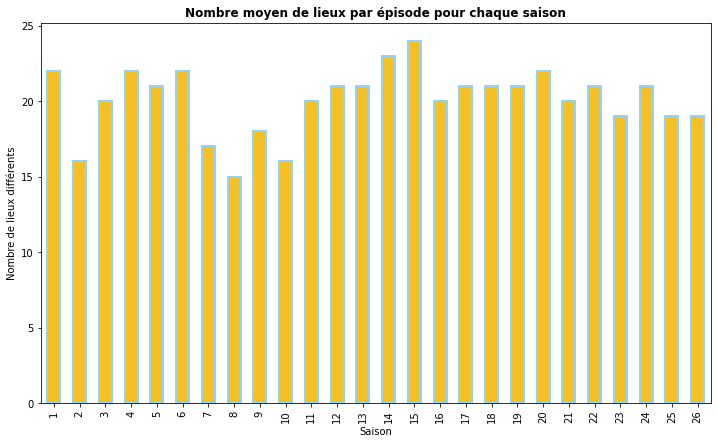

In [38]:
df_script_lines_grouped_season.plot(kind='bar', figsize=(12, 7), legend=False, edgecolor='#92D4F8', color="#F5C024", linewidth=2)

plt.xlabel('Saison')
plt.ylabel('Nombre de lieux différents')

plt.title('Nombre moyen de lieux par épisode pour chaque saison', x=0.5, y=1, fontweight="bold")

#plt.savefig('lines_locations_season.png')

plt.show()

## Lieux où l'on parle le plus

In [14]:
lines_locations = df_script_lines
lines_locations['location_id'] = pd.to_numeric(lines_locations['location_id'], errors="coerce").fillna(0)
lines_locations_values = lines_locations['location_id'].astype(int).value_counts()
lines_locations_values = lines_locations_values.drop(index=0)
df_lines_locations = lines_locations_values.head(14).to_frame()
df_lines_locations['id'] = df_lines_locations.index
df_lines_locations = df_lines_locations.rename(columns={"location_id": "nb_lines"})
df_lines_locations = df_lines_locations[['id', 'nb_lines']]
df_lines_locations
#lieux où plus de 1000 lignes de dialogue sont dites

,id,nb_lines
5,5,35059
3,3,7092
15,15,4628
10,10,3594
136,136,1476
131,131,1416
25,25,1378
270,270,1334
216,216,1314
151,151,1239


In [15]:
df_lines_locations_merged = df_lines_locations.merge(df_locations, how='left', on='id')
df_lines_locations_merged

,id,nb_lines,name,normalized_name
0,5,35059,Simpson Home,simpson home
1,3,7092,Springfield Elementary School,springfield elementary school
2,15,4628,Moe's Tavern,moe tavern
3,10,3594,Springfield Nuclear Power Plant,springfield nuclear power plant
4,136,1476,Kwik-E-Mart,kwik-e-mart
5,131,1416,First Church of Springfield,first church of springfield
6,25,1378,Simpson Living Room,simpson living room
7,270,1334,Springfield Street,springfield street
8,216,1314,Springfield,springfield
9,151,1239,Simpson Car,simpson car


In [16]:
#df_lines_locations_merged.to_csv(r'/Users/heloisevanrenterghem/Documents/THPprojets/lines_locations.csv')

## Répartition de la parole dans la maison

In [17]:
df_lines_house = df_script_lines.loc[df_script_lines['location_id'] == 5]
df_lines_house

,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
id,,,,,,,,,,,,
9604,32,264,(Simpson Home: INT. SIMPSON HOUSE - DINING ROO...,1070000,False,NaN,5.0,NaN,Simpson Home,NaN,NaN,NaN
9660,33,5,Homer Simpson: (INDIGNANT) Never thrown a part...,97000,True,2.0,5.0,Homer Simpson,Simpson Home,Never thrown a party? What about that big bash...,never thrown a party what about that big bash ...,22
9605,32,265,"Homer Simpson: (MULLING IT OVER, LOW, TO HIMSE...",1070000,True,2.0,5.0,Homer Simpson,Simpson Home,"Bart didn't get one vote?! Oh, this is the wor...",bart didnt get one vote oh this is the worst t...,30
9606,32,266,Lisa Simpson: Nothing.,1081000,True,9.0,5.0,Lisa Simpson,Simpson Home,Nothing.,nothing,1
9607,32,267,"Marge Simpson: Lisa, tell your father.",1082000,True,1.0,5.0,Marge Simpson,Simpson Home,"Lisa, tell your father.",lisa tell your father,4
...,...,...,...,...,...,...,...,...,...,...,...,...
9488,32,148,"Marge Simpson: Homer, I've been talking to Lis...",665000,true,1,5.0,Marge Simpson,Simpson Home,"Homer, I've been talking to Lisa and I'm conce...",homer ive been talking to lisa and im concerne...,14
9489,32,149,"Bart Simpson: (MOCK CONCERN) Me, too, Mom. I t...",668000,true,8,5.0,Bart Simpson,Simpson Home,"Me, too, Mom. I think they're drifting apart.",me too mom i think theyre drifting apart,8
9490,32,150,"Homer Simpson: Shut up, boy.",671000,true,2,5.0,Homer Simpson,Simpson Home,"Shut up, boy.",shut up boy,3


In [18]:
df_lines_house['episode_id'].value_counts()
#dans 264 ép (sachant que living room par ex est considéré comme un autre lieu)

20     217
26     194
49     191
69     172
188    171
      ... 
6        5
89       3
272      2
388      2
494      1
Name: episode_id, Length: 545, dtype: int64

In [19]:
df_lines_house = df_lines_house['raw_character_text'].value_counts().sort_values(ascending=False).to_frame()
df_lines_house

,raw_character_text
Homer Simpson,9714
Marge Simpson,6279
Bart Simpson,4120
Lisa Simpson,3847
Grampa Simpson,520
...,...
Shauna Chalmers,1
Homer's Reflection,1
CHIF WIGGUM,1
SMOOTH ANNOUNCER,1


## Les lieux préférés d'Homer

In [20]:
df_locations_homer = df_script_lines.loc[df_script_lines['raw_character_text'] == "Homer Simpson"]
df_locations_homer

,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
id,,,,,,,,,,,,
9660,33,5,Homer Simpson: (INDIGNANT) Never thrown a part...,97000,True,2.0,5.0,Homer Simpson,Simpson Home,Never thrown a party? What about that big bash...,never thrown a party what about that big bash ...,22
9605,32,265,"Homer Simpson: (MULLING IT OVER, LOW, TO HIMSE...",1070000,True,2.0,5.0,Homer Simpson,Simpson Home,"Bart didn't get one vote?! Oh, this is the wor...",bart didnt get one vote oh this is the worst t...,30
9609,32,269,Homer Simpson: Oh.,1086000,True,2.0,5.0,Homer Simpson,Simpson Home,Oh.,oh,1
9611,32,271,Homer Simpson: And?,1088000,True,2.0,5.0,Homer Simpson,Simpson Home,And?,and,1
9613,32,273,"Homer Simpson: Hey, just because I don't care ...",1091000,True,2.0,5.0,Homer Simpson,Simpson Home,"Hey, just because I don't care doesn't mean I ...",hey just because i dont care doesnt mean i don...,11
...,...,...,...,...,...,...,...,...,...,...,...,...
9512,32,172,Homer Simpson: She said that?,756000,true,2,372.0,Homer Simpson,Museum,She said that?,she said that,3
9514,32,174,"Homer Simpson: (SHAKY) But you can tell, right...",760000,true,2,372.0,Homer Simpson,Museum,"But you can tell, right? She looks around and ...",but you can tell right she looks around and se...,40
9516,32,176,"Homer Simpson: (SNAPPING OUT OF IT) Well, if s...",775000,true,2,372.0,Homer Simpson,Museum,"Well, if she's so wonderful, give her an A.",well if shes so wonderful give her an a,9


In [21]:
df_locations_homer = df_locations_homer['location_id'].value_counts().sort_values(ascending=False).to_frame()
df_locations_homer

,location_id
5.0,9714
15.0,1025
10.0,1009
151.0,371
25.0,323
...,...
2457.0,1
2452.0,1
2451.0,1
2442.0,1


In [22]:
df_locations_homer['id'] = df_locations_homer.index
df_locations_homer = df_locations_homer.rename(columns={"location_id": "nb_lines"})
df_locations_homer = df_locations_homer[['id', 'nb_lines']]
df_locations_homer = df_locations_homer.head(5)
df_locations_homer = df_locations_homer.join(df_locations)
df_locations_homer

,id,nb_lines,name,normalized_name
5.0,5.0,9714,Simpson Home,simpson home
15.0,15.0,1025,Moe's Tavern,moe tavern
10.0,10.0,1009,Springfield Nuclear Power Plant,springfield nuclear power plant
151.0,151.0,371,Simpson Car,simpson car
25.0,25.0,323,Simpson Living Room,simpson living room


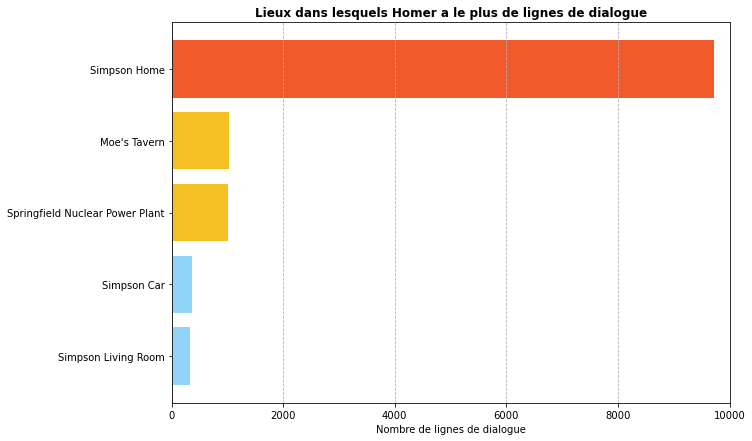

In [23]:
location_color = [('#92D4F8' if i == 323 else '#92D4F8' if i == 371 else '#F15A2A' if i == 9714 else '#F5C024') for i in df_locations_homer['nb_lines']]

df_locations_homer.plot.barh(x='name', y='nb_lines', color=location_color, figsize=[10,7], width=0.8).invert_yaxis()

plt.xlabel("Nombre de lignes de dialogue")
plt.ylabel("")

ax = plt.subplot(111)
ax.get_legend().remove()

plt.xlim([0, 10000])

plt.gca().xaxis.grid(True, linestyle='--')

plt.title("Lieux dans lesquels Homer a le plus de lignes de dialogue", x=0.5, y=1, fontweight="bold")

#plt.savefig('top_locations_homer.png')

plt.show()

## L'environnement naturel du monde des Simpson

In [24]:
df_nature = pd.read_excel("simpsons_environnement_naturel.xlsx", index_col=0)
df_nature

,categ_location,location
863,Lakes,Catfish Lake
864,Lakes,Lake Springfield
865,Lakes,Lake Tahoe
866,Lakes,Loch Ness
867,Lakes,Lower Springfield Lake
868,Lakes,Nuclear Lake
869,Lakes,Terror Lake
1038,Mountains,Challenge Peak
1039,Mountains,Mount Carlmore
1040,Mountains,Mt. Embolism


In [25]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import os
from os import path

In [26]:
df_lakes = df_nature.loc[df_nature['categ_location'] == "Lakes"].copy()
df_lakes['categ_location'] = df_lakes['categ_location'].replace("Lakes", 1)
dict_lakes = dict(zip(df_lakes["location"], df_lakes["categ_location"]))
dict_lakes

{'Catfish Lake': 1,
 'Lake Springfield': 1,
 'Lake Tahoe': 1,
 'Loch Ness': 1,
 'Lower Springfield Lake': 1,
 'Nuclear Lake': 1,
 'Terror Lake': 1}

In [27]:
d_lakes = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
lakes_mask = np.array(Image.open(path.join(d_lakes, '/Users/heloisevanrenterghem/Documents/THPprojets/Simpsons/masks_nature/2.png')))
lakes_colors = ImageColorGenerator(lakes_mask)

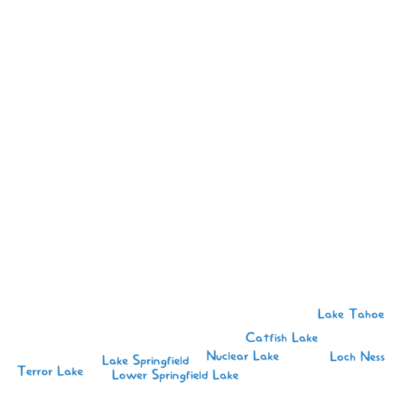

In [28]:
wordcloud_lakes = WordCloud(font_path = 'Homer_Simpson_Revised.ttf', width=4000, height=4000, background_color="white", mask=lakes_mask, min_font_size=21, max_font_size=21, prefer_horizontal=1).generate_from_frequencies(dict_lakes)
wordcloud_lakes.recolor(color_func = lakes_colors)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_lakes, interpolation='bilinear')
plt.axis("off")
#plt.savefig('lakes.png')
plt.show()

In [29]:
df_beaches = df_nature.loc[df_nature['categ_location'] == "Beaches"].copy()
df_beaches['categ_location'] = df_beaches['categ_location'].replace("Beaches", 1)
dict_beaches = dict(zip(df_beaches["location"], df_beaches["categ_location"]))
dict_beaches

{'Baby Seal Beach': 1,
 'Dimoxinil Beach': 1,
 'Miami Beach': 1,
 'Sandy Beach': 1,
 'Shelbyville Beach': 1,
 'Springfield Beach': 1}

In [30]:
d_beaches = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
beaches_mask = np.array(Image.open(path.join(d_beaches, '/Users/heloisevanrenterghem/Documents/THPprojets/Simpsons/masks_nature/3.png')))
beaches_colors = ImageColorGenerator(beaches_mask)

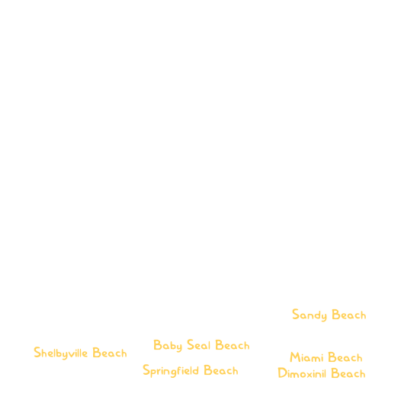

In [31]:
wordcloud_beaches = WordCloud(font_path = 'Homer_Simpson_Revised.ttf', width=4000, height=4000, background_color="white", mask=beaches_mask, min_font_size=21, max_font_size=21, prefer_horizontal=1).generate_from_frequencies(dict_beaches)
wordcloud_beaches.recolor(color_func = beaches_colors)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_beaches, interpolation='bilinear')
plt.axis("off")
#plt.savefig('beaches.png')
plt.show()

In [32]:
df_mountains = df_nature.loc[df_nature['categ_location'] == "Mountains"].copy()
df_mountains['categ_location'] = df_mountains['categ_location'].replace("Mountains", 1)
dict_mountains = dict(zip(df_mountains["location"], df_mountains["categ_location"]))
dict_mountains

{'Challenge Peak': 1,
 'Mount Carlmore': 1,
 'Mt. Embolism': 1,
 'Mt. Springfield': 1,
 'Mt. Useful': 1,
 'The Murderhorn': 1,
 'Springfield Mountains': 1,
 "Widow's Peak": 1}

In [33]:
d_mountains = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mountains_mask = np.array(Image.open(path.join(d_mountains, '/Users/heloisevanrenterghem/Documents/THPprojets/Simpsons/masks_nature/4.png')))
mountains_colors = ImageColorGenerator(mountains_mask)

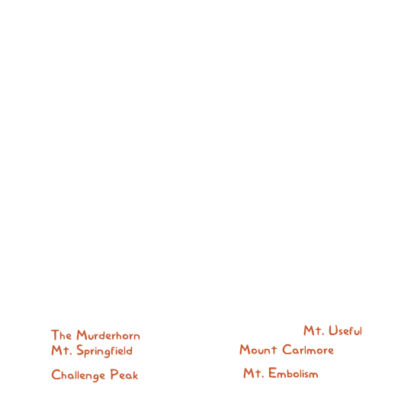

In [34]:
wordcloud_mountains = WordCloud(font_path = 'Homer_Simpson_Revised.ttf', width=4000, height=4000, background_color="white", mask=mountains_mask, min_font_size=21, max_font_size=21, prefer_horizontal=1).generate_from_frequencies(dict_mountains)
wordcloud_mountains.recolor(color_func = mountains_colors)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_mountains, interpolation='bilinear')
plt.axis("off")
#plt.savefig('mountains.png')
plt.show()

In [35]:
df_forests = df_nature.loc[df_nature['categ_location'] == "National parks and forests"].copy()
df_forests['categ_location'] = df_forests['categ_location'].replace("National parks and forests", 1)
dict_forests = dict(zip(df_forests["location"], df_forests["categ_location"]))
dict_forests

{'Potato Rock National Park': 1,
 'Springfield Forest': 1,
 'Springfield Monument Park': 1,
 'Springfield National Forest': 1,
 'Springfield National Park': 1,
 'Springfield Nature Preserve': 1}

In [36]:
d_forests = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
forests_mask = np.array(Image.open(path.join(d_forests, '/Users/heloisevanrenterghem/Documents/THPprojets/Simpsons/masks_nature/1.png')))
forests_colors = ImageColorGenerator(forests_mask)

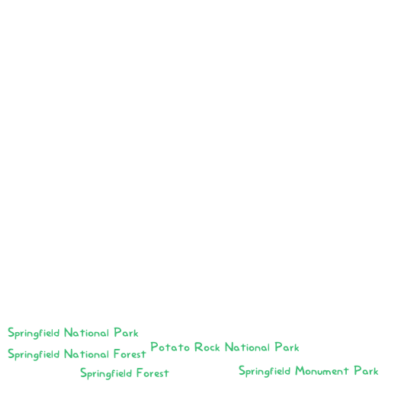

In [37]:
wordcloud_forests = WordCloud(font_path = 'Homer_Simpson_Revised.ttf', width=4000, height=4000, background_color="white", mask=forests_mask, min_font_size=19, max_font_size=19, prefer_horizontal=1).generate_from_frequencies(dict_forests)
wordcloud_forests.recolor(color_func = forests_colors)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_forests, interpolation='bilinear')
plt.axis("off")
#plt.savefig('forests.png')
plt.show()